# Short Loops
Configure some HYDRAD simulations for really short loops

In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import hydrad_tools.configure
import hydrad_tools.visualize
import hydrad_tools.parse
from IPython.display import HTML

%matplotlib inline

In [6]:
base_config = hydrad_tools.configure.Configure.load_config(
    '/Users/willbarnes/Documents/work/codes/hydrad_tools/defaults.asdf')
base_config['general']['total_time'] = 5e3*u.s
base_config['general']['loop_length'] = 15*u.Mm
base_config['general']['loop_inclination'] = 0*u.deg
base_config['general']['heat_flux_limiting_coefficient'] = 1./6.
base_config['initial_conditions']['heating_location'] = 7.5*u.Mm
base_config['initial_conditions']['heating_scale_height'] = 1e300*u.cm
base_config['heating']['events'] = [{'time_start': 0*u.s,
                                        'rise_duration': 100*u.s,
                                        'decay_duration': 100*u.s,
                                        'total_duration': 200*u.s,
                                        'location': 7.5*u.Mm,
                                        'scale_height': 1e300*u.cm,
                                        'rate': 0.1*u.erg/u.s/(u.cm**3)}]
base_config['grid']['enforce_conservation'] = False
base_config['grid']['linear_restriction'] = True
base_config['grid']['minimum_fractional_difference'] = 0.1
base_config['grid']['maximum_fractional_difference'] = 0.2

In [7]:
c = hydrad_tools.configure.Configure(base_config)

In [8]:
c.setup_simulation('.',name='short_loop',base_path='/Users/willbarnes/Documents/work/codes/HYDRAD/')




../../Resources/Utils/regPoly/regpoly.cpp:34:24: warning: conversion from string literal to 'char *' is deprecated [-Wc++11-compat-deprecated-writable-strings]
if (mfit == 0) nrerror("lfit: no parameters to be fitted");
                       ^
../../Resources/Utils/regPoly/regpoly.cpp:125:36: warning: conversion from string literal to 'char *' is deprecated [-Wc++11-compat-deprecated-writable-strings]
        if (a[icol][icol] == 0.0) nrerror("gaussj: Singular Matrix");
                                          ^
../../Resources/Utils/regPoly/regpoly.cpp:98:23: warning: unused variable 'temp' [-Wunused-variable]
double big,dum,pivinv,temp;
                      ^
../../Resources/Utils/regPoly/regpoly.cpp:334:25: warning: conversion from string literal to 'char *' is deprecated [-Wc++11-compat-deprecated-writable-strings]
        if (its == 30) nrerror("no convergence in 30 svdcmp iterations");
                               ^
4 warnings generated.
../../Resources/Utils/regPoly/nrut

In [2]:
s = hydrad_tools.parse.Strand('short_loop/')

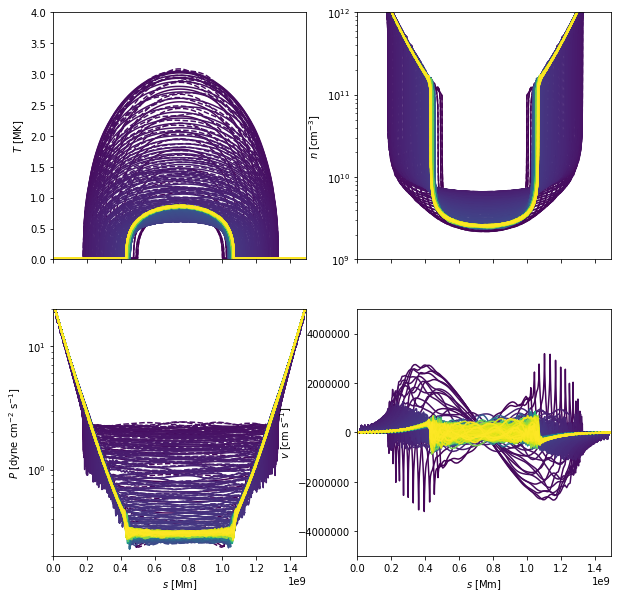

In [4]:
hydrad_tools.visualize.plot_strand(s,step=10,stop=5000,limits={'velocity':(-5e6,5e6),'temperature':(0,4),
                                                               'density':(1e9,1e12),'pressure':(0.2,20)},
                                   cmap='viridis')

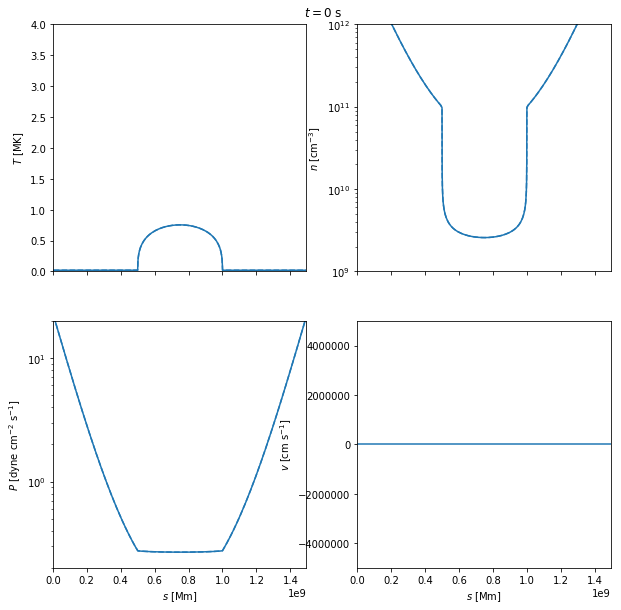

In [7]:
anim = hydrad_tools.visualize.animate_strand(s, start=0,step=5,stop=1000,interval=50,
                                             limits={'velocity':(-5e6,5e6),'temperature':(0,4),
                                                     'density':(1e9,1e12),'pressure':(0.2,20)})

In [8]:
HTML(anim.to_html5_video())